In [55]:
from tools.data.flcdata import load_npz_file

# ds_name = a1812-06127_synth_iid
ds_name = "a1812-06127_mnist"
data = load_npz_file(f"data/{ds_name}/data.npz")
n_partitions = data['n_partitions']
n_samples = data['n_samples']
n_classes = data['n_classes']
YY = data['YY']
PP = data['PP']
XX = data['XX']
del data

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [57]:
df = pd.DataFrame({
    "Partition": PP,
    "Class": YY
})

In [61]:
PartClassCT = pd.crosstab(df['Partition'], df['Class'])

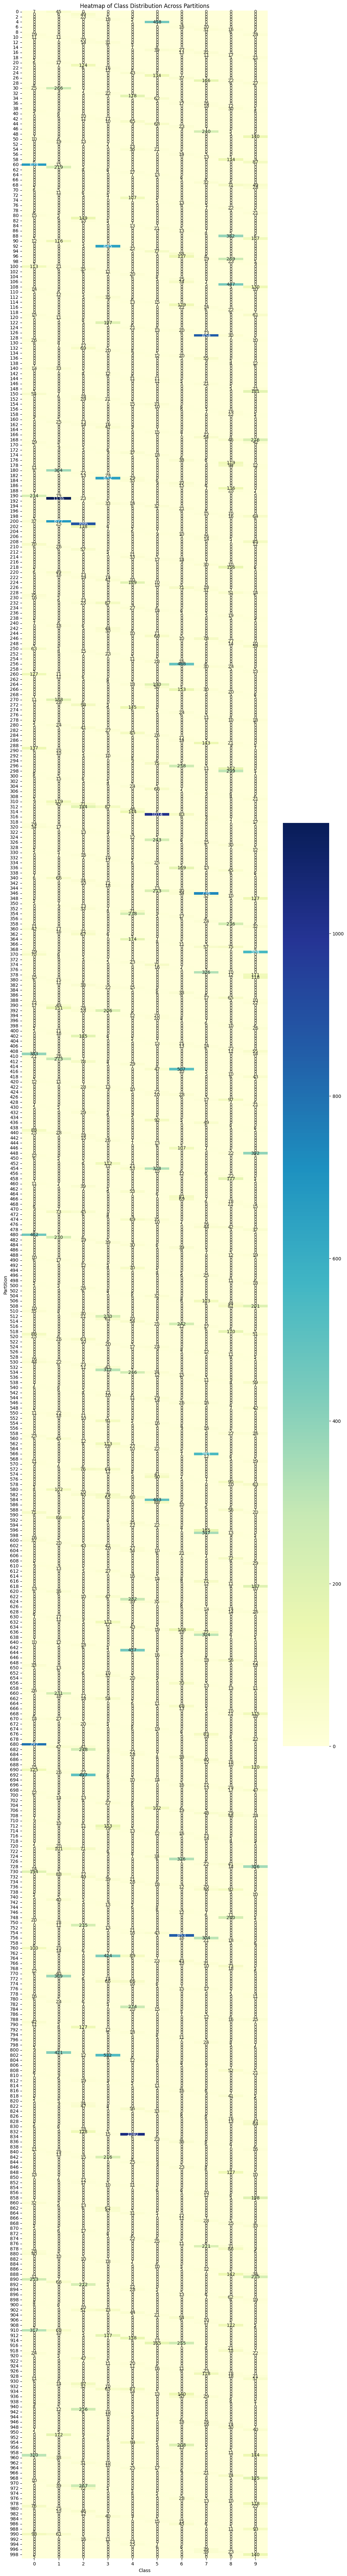

In [63]:
plt.figure(figsize=(12, 100))

sns.heatmap(PartClassCT, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Heatmap of Class Distribution Across Partitions")
plt.xlabel("Class")
plt.ylabel("Partition")
plt.show()

In [ ]:
num_classes = n_classes
features = len(XX[0])  # number of features in the dataset
assert features > 3
p = 3

Q_list = []

for c in range(num_classes):
    Q_list.append(XX[YY == c])

Q_principal_base_vecs = []
for c in range(num_classes):
    Q = Q_list[c]
    Q = Q.T
    u1, sh1, vh1 = np.linalg.svd(Q, full_matrices=False)

    # normalize u1
    u1 = u1 / np.linalg.norm(u1, ord=2, axis=0)
    assert p < u1.shape[1]
    u1 = u1[:, :p]
    Q_principal_base_vecs.append(u1.T)  # shape (p, features)


def Eq_Basis(A,B):
    AB=np.arccos(A.T@B)
    A_E=np.zeros((A.shape[0],A.shape[1]))
    B_E=np.zeros((B.shape[0],B.shape[1]))
    for i in range(AB.shape[0]):
        ind = np.unravel_index(np.argmin(AB, axis=None), AB.shape)
        AB[ind[0],:]=AB[:,ind[1]]=0
        A_E[:,i]=A[:,ind[0]]
        B_E[:,i]=B[:,ind[1]]
    return  A_E,B_E

sim_angle_min = np.zeros((num_classes, num_classes))
sim_angle_tr = np.zeros((num_classes, num_classes))

for c1 in range(num_classes):
    for c2 in range(num_classes):
        F, G = Eq_Basis(Q_principal_base_vecs[c1], Q_principal_base_vecs[c2])
        F_in_G = np.clip(F.T @ G, a_min=-1, a_max=1)
        Angle = np.arccos(np.abs(F_in_G))
        sim_angle_min[c1, c2] = (180/np.pi) * np.min(Angle)
        sim_angle_tr[c1, c2] = (180/np.pi) * np.trace(Angle)


# create seaborn heatmap
print(sim_angle_min.round(decimals=2))
print(sim_angle_tr.round(decimals=1))



